
# FBI 枪支数据分析报告

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本研究运用美国FBI枪支数据，探索以下2个问题：
    1. 不同州在1998至2017年间permit枪支的增长情况
    2. handgun枪支在所有州的平均购买量随时间的变化趋势

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理
> 从Excel导入数据

In [4]:
df = pd.read_excel('gun_data.xlsx')

### 常规属性
> 读取数据的第一行，进行初步了解

In [5]:
df.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


> 查看行列数和各列数据类型

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

> 除了"month"和"state"外，其余列均为float或integer，符合预期

> 进一步查看类型为object的2列

In [8]:
type(df['month'][0])

str

> 'month'列是字符格式，在数据清理中需要把它转换为时间格式

In [9]:
type(df['state'][0])

str

> 'state'列是字符格式，符合常理

> 检查数据是否有缺失

In [14]:
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

> 部分列有数据缺失，需要在数据清理中处理缺失

> 检查数据是否有重复项

In [12]:
sum(df.duplicated())

0

> 数据没有重复项

### 数据清理

> **1. 转换数据类型**

> 将'month'列转换为datetime格式

In [15]:
df['month'] = pd.to_datetime(df['month'])

> 确认转换后的数据类型

In [16]:
type(df['month'][0])

pandas._libs.tslibs.timestamps.Timestamp

> **2. 数据缺失处理**

> 首先查看各列的数据特征

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
permit,12461.0,6413.629404,23752.338269,0.0,0.00,518.0,4272.00,522188.0
permit_recheck,1100.0,1165.956364,9224.200609,0.0,0.00,0.0,0.00,116681.0
handgun,12465.0,5940.881107,8618.584060,0.0,865.00,3059.0,7280.00,107224.0
long_gun,12466.0,7810.847585,9309.846140,0.0,2078.25,5122.0,10380.75,108058.0
other,5500.0,360.471636,1349.478273,0.0,17.00,121.0,354.00,77929.0
multiple,12485.0,268.603364,783.185073,0.0,15.00,125.0,301.00,38907.0
admin,12462.0,58.898090,604.814818,0.0,0.00,0.0,0.00,28083.0
prepawn_handgun,10542.0,4.828021,10.907756,0.0,0.00,0.0,5.00,164.0
prepawn_long_gun,10540.0,7.834156,16.468028,0.0,0.00,1.0,8.00,269.0
prepawn_other,5115.0,0.165591,1.057105,0.0,0.00,0.0,0.00,49.0


> 对于数据类型为integer和float的所有列，最小值均为0.0。结合实际我们可以猜测，在没有被完整记录的数据中，缺失值可能即是0。因为此数据存在限制，我们暂时用此猜测进行分析。

> 用0填充所有缺失项

In [20]:
df.fillna(0, inplace=True)

> 再次确认数据缺失

In [22]:
df.isnull().any().sum()

0

> 现在数据中没有缺失

<a id='eda'></a>
## 探索性数据分析

> 首先用直方图查看数据类型为integer和float的所有列的数据分布情况

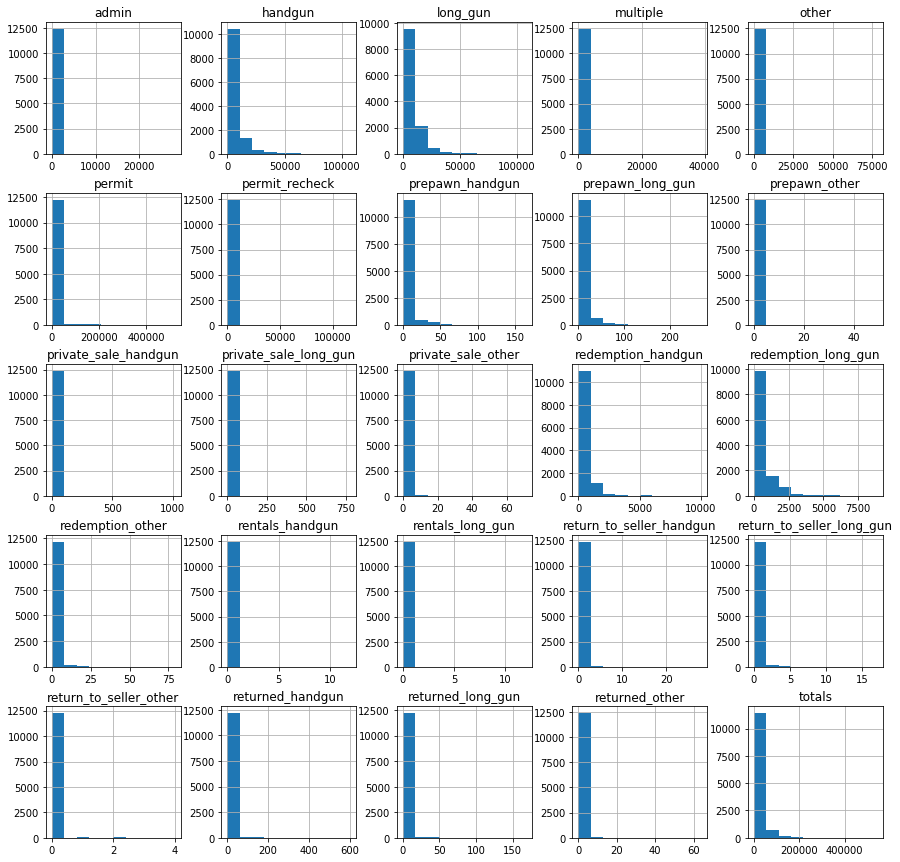

In [23]:
df.hist(figsize=(15,15));

> 所有列均为右偏态分布

###  1. 不同州在1998至2017年间permit枪支的增长情况

> 先查看不同州在1998至2017年间permit枪支的总量

> 按'state'对'permit'列进行分组求和

In [24]:
df_state_permit = df.groupby('state', as_index=False)['permit'].sum()

> 按'permit'列排序，以便作图比较

In [28]:
df_state_permit.sort_values('permit', inplace=True)

> 查看数据的第1行

In [30]:
df_state_permit.head(1)

,state,permit
41,Puerto Rico,0.0


> 以州为横坐标，permit枪支总量为纵坐标，作柱状图

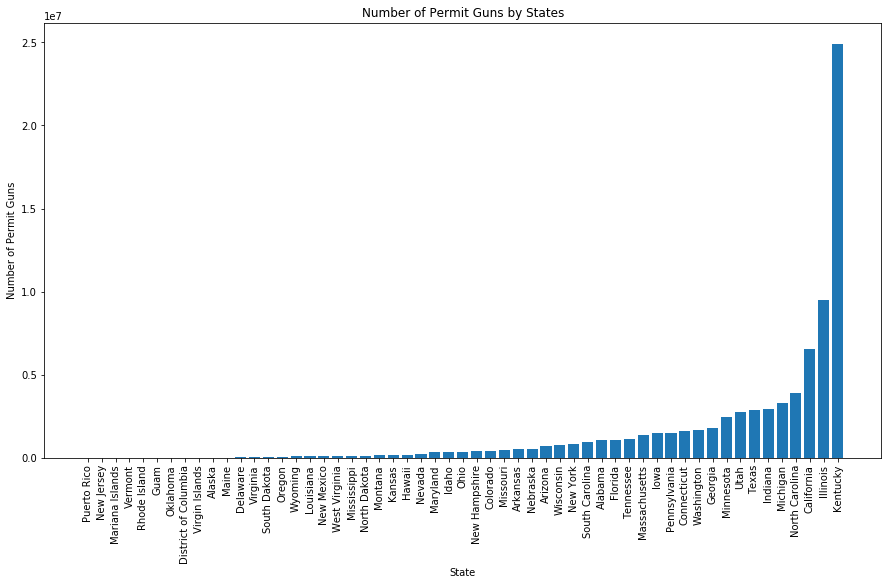

In [32]:
plt.subplots(figsize=(15,8))
plt.bar(df_state_permit['state'], df_state_permit['permit'])
plt.title('Number of Permit Guns by States')
plt.xlabel('State')
plt.ylabel('Number of Permit Guns')
plt.xticks(rotation='vertical');

> 不同州的permit枪支总量差异非常大。部分州permit枪支数量为0。Kentucky州permit枪支数量最多。

> 接下来只选取统计数据的第一个月份和最后一个月份的数据，对不同州的permit枪支数量变化进行比较。

> 查看第一个月份和最后一个月份

In [34]:
df['month'].describe()

count                   12485
unique                    227
top       2002-11-01 00:00:00
freq                       55
first     1998-11-01 00:00:00
last      2017-09-01 00:00:00
Name: month, dtype: object

> 选取first和last月份的'state'和'permit'列

In [35]:
df_permit_begin = df.query('month == "1998-11-01"').iloc[:, 1:3]
df_permit_end = df.query('month == "2017-09-01"').iloc[:, 1:3]

> 合并数据

In [36]:
df_permit_growth = df_permit_begin.merge(df_permit_end, on='state', suffixes=('_1998_11', '_2017_09'), how='inner')

> 检查是否完成合并

In [37]:
df_permit_growth.head()

,state,permit_1998_11,permit_2017_09
0,Alabama,0.0,16717.0
1,Alaska,4.0,209.0
2,Arizona,0.0,5069.0
3,Arkansas,0.0,2935.0
4,California,434.0,57839.0


> 作2个月份的柱状图

In [55]:
ind = np.arange(len(df_permit_growth['state']))
width = 0.35
locations = ind + width / 2

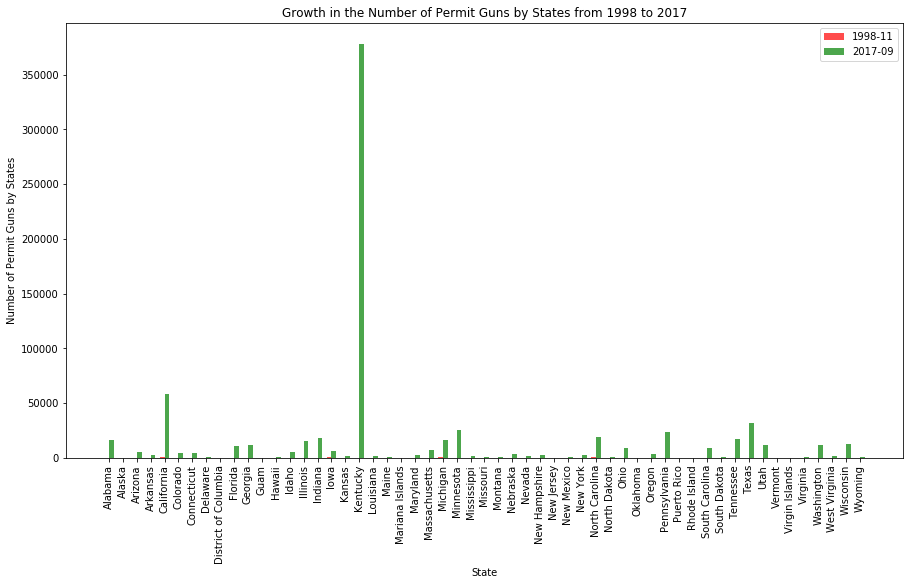

In [39]:
plt.subplots(figsize=(15,8))
begin_bars = plt.bar(ind, df_permit_growth['permit_1998_11'], width, color='r', alpha=.7, label='1998-11')
end_bars = plt.bar(ind + width, df_permit_growth['permit_2017_09'], width, color='g', alpha=.7, label='2017-09')
plt.ylabel('Number of Permit Guns by States')
plt.xlabel('State')
plt.title('Growth in the Number of Permit Guns by States from 1998 to 2017')
plt.xticks(locations, df_permit_growth['state'], rotation='vertical')
plt.legend();

> 不同州的变化差距不同。部分州的变化不显著。部分州的变化巨大。变化最大的是Kentucky州。

> 虽然从这张图可以看出不同州的变化差距，但是因为Kentucky出现异常值，导致变化差距不大的部分州不能直观地从图上看出变化幅度。而且因为1998年11月所有州的permit枪支数量都较小，在图上不能清楚展示。所以进一步分析不同州的permit枪支数量的变化幅度。

In [105]:
df_permit_growth['permit_1998_11'].value_counts()

0.0      40
4.0       2
8.0       1
3.0       1
1.0       1
524.0     1
88.0      1
9.0       1
579.0     1
59.0      1
314.0     1
27.0      1
2.0       1
17.0      1
434.0     1
Name: permit_1998_11, dtype: int64

> 因为部分州在1998年11月的数值为0，不便于用增长率反映，所以计算增长量来进一步分析。

In [41]:
df_permit_growth['growth'] = df_permit_growth['permit_2017_09'] - df_permit_growth['permit_1998_11']

In [42]:
df_permit_growth.head(1)

,state,permit_1998_11,permit_2017_09,growth
0,Alabama,0.0,16717.0,16717.0


> 作不同州permit枪支增长量的柱状图

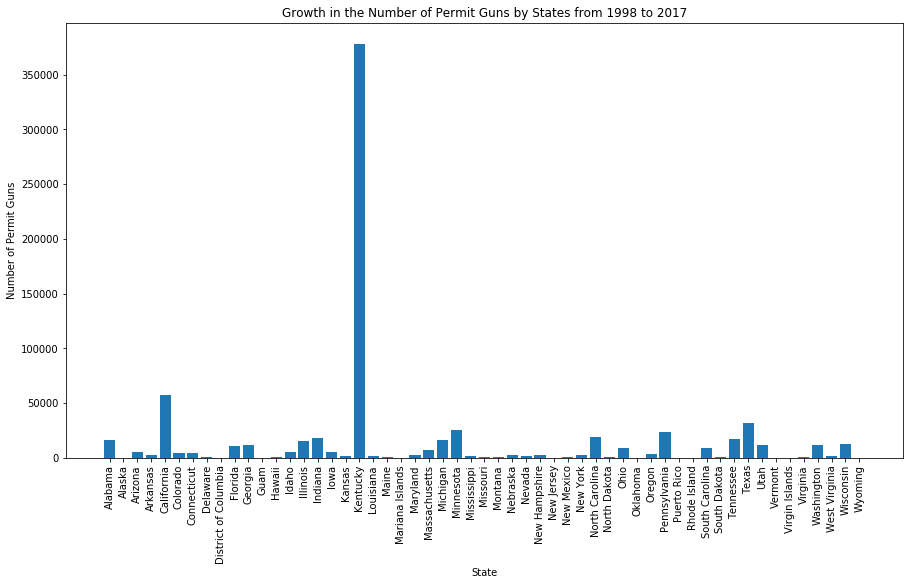

In [43]:
plt.subplots(figsize=(15,8))
plt.bar(df_permit_growth['state'], df_permit_growth['growth'])
plt.title('Growth in the Number of Permit Guns by States from 1998 to 2017')
plt.xlabel('State')
plt.ylabel('Number of Permit Guns')
plt.xticks(rotation='vertical');

> Kentucky州的数值依然异常。下面从数据中剔除Kentucky州，再次分析变化趋势。

In [50]:
df_permit_growth.query('state == "Kentucky"')

,state,permit_1998_11,permit_2017_09,growth
18,Kentucky,0.0,378384.0,378384.0


In [52]:
df_permit_growth.drop(18, axis=0, inplace=True)

In [55]:
ind = np.arange(len(df_permit_growth['state']))
width = 0.35
locations = ind + width / 2

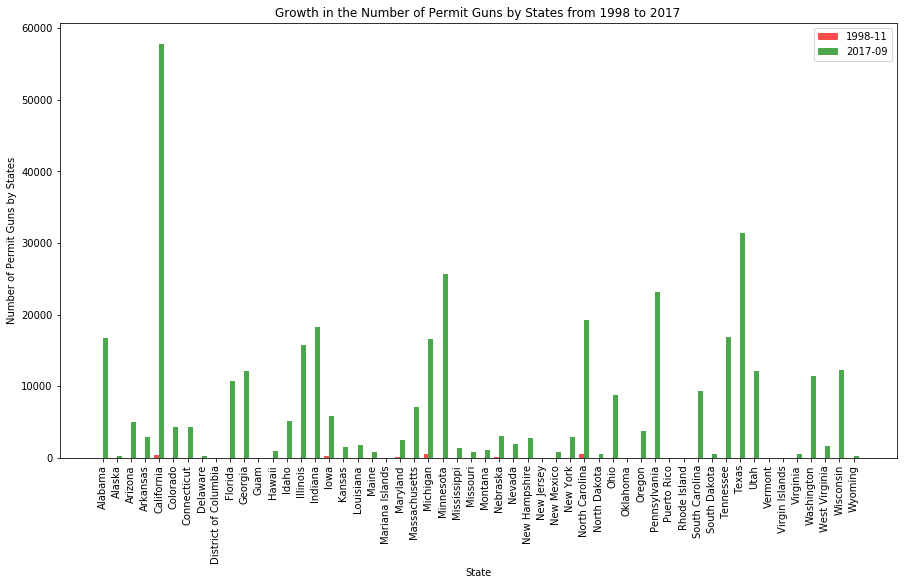

In [56]:
plt.subplots(figsize=(15,8))
plt.bar(ind, df_permit_growth['permit_1998_11'], width, color='r', alpha=.7, label='1998-11')
plt.bar(ind + width, df_permit_growth['permit_2017_09'], width, color='g', alpha=.7, label='2017-09')
plt.ylabel('Number of Permit Guns by States')
plt.xlabel('State')
plt.title('Growth in the Number of Permit Guns by States from 1998 to 2017')
plt.xticks(locations, df_permit_growth['state'], rotation='vertical')
plt.legend();

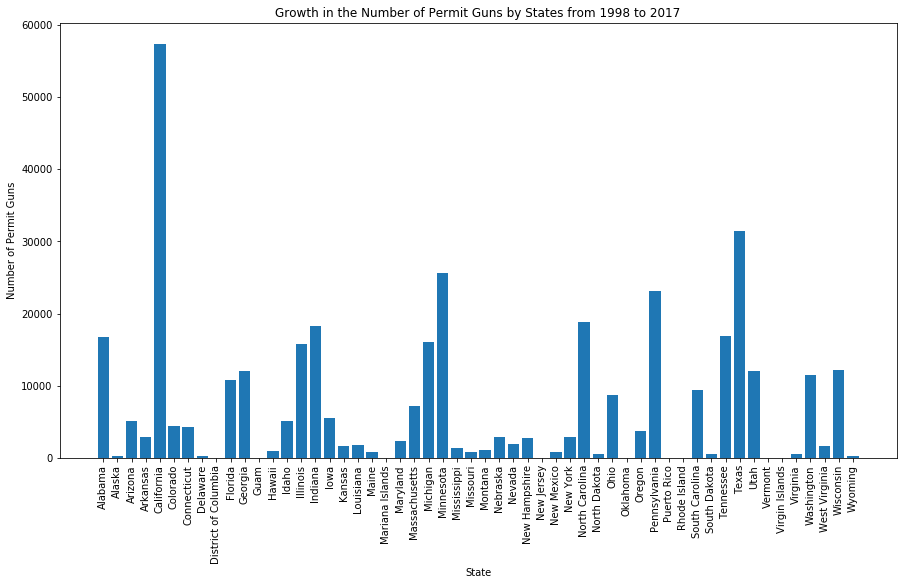

In [57]:
plt.subplots(figsize=(15,8))
plt.bar(df_permit_growth['state'], df_permit_growth['growth'])
plt.title('Growth in the Number of Permit Guns by States from 1998 to 2017')
plt.xlabel('State')
plt.ylabel('Number of Permit Guns')
plt.xticks(rotation='vertical');

> 可以看到不同州的变化差距依然非常大。

### 2. handgun枪支在所有州的平均购买量随时间的变化趋势

> 按'month'对'handgun'列进行分组求平均值，计算出不同月份所有州handgun枪支数量的平均值

In [58]:
df_handgun = df.groupby('month', as_index=False)['handgun'].mean()

In [59]:
df_handgun.head(1)

,month,handgun
0,1998-11-01,124.709091


> 以时间为横坐标，handgun枪支数量为纵坐标，作折线图

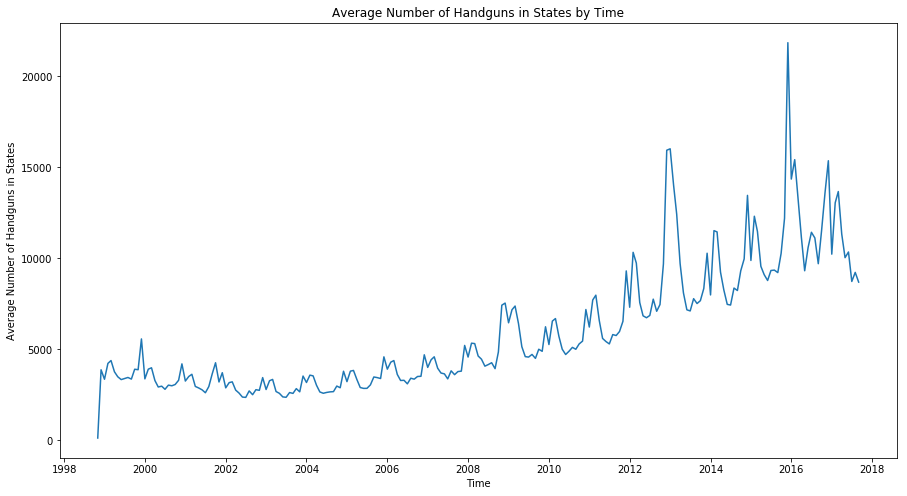

In [60]:
plt.subplots(figsize=(15,8))
plt.plot(df_handgun['month'], df_handgun['handgun'])
plt.title('Average Number of Handguns in States by Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Handguns in States');

> handgun枪支数量随时间呈波动上升的趋势。从图中可以看出基本上每年出现一次波峰，一次波谷，在波峰上又出现一个小的波谷。我们可以猜测handgun枪支的购买量随季节变化。

> 下面采用移动平均的方法，消除扰动项。

In [61]:
df_handgun['moving_ave'] = df_handgun['handgun'].rolling(window=3).mean()

In [62]:
df_handgun.head()

,month,handgun,moving_ave
0,1998-11-01,124.709091,NaN
1,1998-12-01,3875.272727,NaN
2,1999-01-01,3354.472727,2451.484848
3,1999-02-01,4226.327273,3818.690909
4,1999-03-01,4382.472727,3987.757576


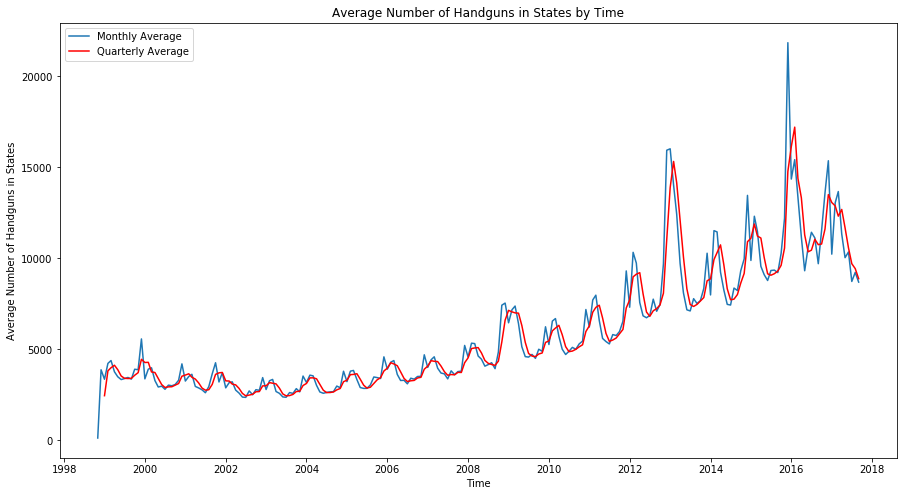

In [64]:
plt.subplots(figsize=(15,8))
orig_line = plt.plot(df_handgun['month'], df_handgun['handgun'], label='Monthly Average')
movi_line = plt.plot(df_handgun['month'], df_handgun['moving_ave'], color='r', label='Quarterly Average')
plt.title('Average Number of Handguns in States by Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Handguns in States')
plt.legend();

> 从图中可以看出，每年handgun枪支的州平均购买量随季节变化上下波动。从1998至2008年整体变化较为平缓，维持在2000到5000之间。从2009年开始，handgun枪支的州平均购买量呈波动趋势快速上升，并在2013年和2016出现异常峰值。

<a id='conclusions'></a>
## 结论

> 本研究总结出以下调查结果：
    1. 不同州在1998至2017年间permit枪支数量增长呈现出巨大的差异。
    2. handgun枪支在所有州的平均购买量随时间波动上升，在1998至2008年间变化平缓，在2009至2017年间快速上升。

> 因本研究存在局限性，如对于缺失的数据无法确认实际的数值。因此本研究得出的结论是暂时的，需要进一步探索验证。

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255